# 資料處理Q&A

1. 先處理 NaN、inf 還先濾波??
    > 先處理 Nan、inf

2. ### 刪除Channel 還是刪除人??
    > 先刪除 Channel，不行再刪除人

In [62]:
# import 必須資料
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# 確認資料夾，確認VFT data 跟 .ipynb 沒放同一個資料夾
print(os.getcwd())

c:\Users\BOIL_PO\Desktop\[自練] 清彥上manual


In [64]:
# 找所有的csv名字
all_csv = glob.glob('VFT/*.csv')
print("length = ", len(all_csv))

# 計算沒有重複的名字，避免有些人重複多次
count_name = []
for banana in all_csv :
    real_name = banana.split('_')[-1].split('.')[0]
    if not real_name in count_name:
        count_name.append(real_name)

print('unique name = ', len(count_name))

# 看前五個
all_csv[:5]

length =  39
unique name =  39


['VFT\\2021_3_26_1012_Carnelian.csv',
 "VFT\\2021_3_26_1045_Kal'tsit.csv",
 'VFT\\2021_3_26_1118_Skadi-the-Corrupting-Heart.csv',
 'VFT\\2021_3_26_1143_Gladiia.csv',
 'VFT\\2021_3_26_1405_Ash.csv']

## 先試試一個人
正常需使用`df = df.iloc[:, :11]`

`df = df.iloc[:, :9]` 是因為Ch4 經過考量捨棄，為捨棄前請全取

In [65]:
select = 11
csv_name = all_csv[3]
df = pd.read_csv(csv_name)
df = df.iloc[:, :select]
df.columns

Index(['Time_Host', 'Time_Arduino', 'easingdata', 'CH1_Oxy', 'CH1_Deoxy',
       'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy', 'CH4_Oxy', 'CH4_Deoxy'],
      dtype='object')

In [66]:
# check null <必>
df.isna().sum()

Time_Host       0
Time_Arduino    0
easingdata      0
CH1_Oxy         0
CH1_Deoxy       0
CH2_Oxy         0
CH2_Deoxy       0
CH3_Oxy         0
CH3_Deoxy       0
CH4_Oxy         0
CH4_Deoxy       0
dtype: int64

# 畫圖看看

1. 用 `subplot()` 可以自動一格一格畫
2. 記得 `tight_layout`

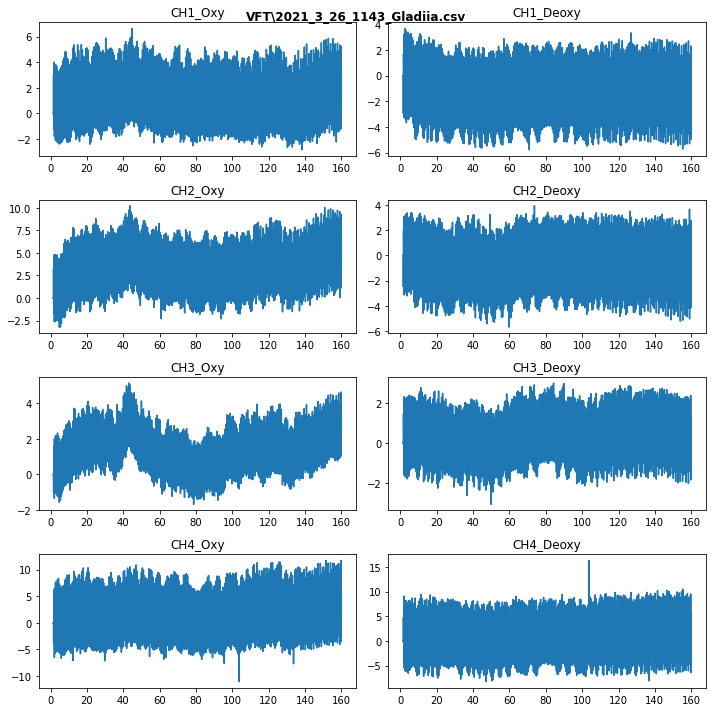

In [67]:
fig = plt.figure(figsize= (10, 10))


for i, cols in enumerate(df.columns[3:]):
    plt.subplot(int((select-3)/2), 2, i+1)
    plt.plot(df['Time_Host'], df[cols])
    plt.title(cols)
    plt.tight_layout()

fig.suptitle(f'{csv_name}',fontweight ="bold")

plt.show()

# 開始做data process
### 1. 看 NuN 、infinite 

In [68]:
check_state = pd.DataFrame()

for i in all_csv:
    # 取名字
    filename = i.split('_')[-1]
    name = filename.split('.')[0] 
    dfs = pd.read_csv(i)
    # 取要的行
    dfs = dfs.iloc[:, :select]
    check_state[name + '_all'] = dfs.isna().sum() + np.isinf(dfs).sum()

check_state.tail(8)

,Carnelian_all,Kal'tsit_all,Skadi-the-Corrupting-Heart_all,Gladiia_all,Ash_all,Dusk_all,Saga_all,Archetto_all,Mountain_all,Rosmontis_all,...,Bena_all,Kafka_all,Robin_all,Amiya_all,Whisperain_all,Mint_all,April_all,Bibeak_all,Warfarin_all,Specter_all
CH1_Oxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH1_Deoxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH2_Oxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH2_Deoxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH3_Oxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH3_Deoxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH4_Oxy,0,0,0,0,0,0,2877,0,0,0,...,0,0,0,0,0,0,0,2880,0,0
CH4_Deoxy,0,0,0,0,0,0,2877,0,0,0,...,0,0,0,0,0,0,0,2880,0,0


### 看一下各Channel狀況(上面dataframe水平加起來)

> 太多Nan的就要去除掉

In [69]:
check_state.sum(axis= 1)

Time_Host          0
Time_Arduino       0
easingdata       256
CH1_Oxy         1363
CH1_Deoxy       1363
CH2_Oxy         2529
CH2_Deoxy       2529
CH3_Oxy            8
CH3_Deoxy          8
CH4_Oxy         5757
CH4_Deoxy       5757
dtype: int64

### 去除Channel 4，請用drop

In [70]:
check_state = pd.DataFrame()

for i in all_csv:
    filename = i.split('_')[-1]
    name = filename.split('.')[0] 
    dfs = pd.read_csv(i)
    dfs = dfs.iloc[:, :select]
    dfs.drop(columns=['CH4_Oxy', 'CH4_Deoxy'], inplace= True)
    check_state[name + '_all'] = dfs.isna().sum() + np.isinf(dfs).sum()

check_state.tail(8)

,Carnelian_all,Kal'tsit_all,Skadi-the-Corrupting-Heart_all,Gladiia_all,Ash_all,Dusk_all,Saga_all,Archetto_all,Mountain_all,Rosmontis_all,...,Bena_all,Kafka_all,Robin_all,Amiya_all,Whisperain_all,Mint_all,April_all,Bibeak_all,Warfarin_all,Specter_all
Time_Arduino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
easingdata,0,0,0,0,0,0,256,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH1_Oxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH1_Deoxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH2_Oxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH2_Deoxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH3_Oxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH3_Deoxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 看一下每個人的狀況(上面dataframe垂直加起來)

> 太多Miss的就要去除掉

In [71]:
rank = check_state.sum(axis= 0).sort_values(ascending= False)[:12]
rank

Saga_all         3218
Specter_all      2118
Ash_all           876
Dusk_all          604
Bagpipe_all       444
Blaze_all         410
Suzuran_all       186
Surtr_all          76
Ceobe_all          52
SilverAsh_all      36
Saria_all          12
Robin_all          12
dtype: int64

# NaN + inf > 1000 的人刪除

> 閥值自己訂


In [72]:
print("Number of Data", len(all_csv))
bad = rank[rank >1000].index
for alls in all_csv:
    for bads in bad:
        name1 = bads.split("_")[0]

        if name1 in alls:
            print("Delect: ", alls)
            all_csv.remove(alls)

print("Number of Data", len(all_csv))

Number of Data 39
Delect  VFT\2021_3_26_1520_Saga.csv
Delect  VFT\2021_4_23_1650_Specter.csv
Number of Data 37


# 補值

> ### 就算少，還是不可以有 null, inf

1. ffill -> 最好用，補前值
2. bfill -> 補後值
3. `pandas.DataFrame.interpolate`  -> 1, 2, ?, 4, 5  $\rightarrow$ ? = 3



In [89]:
# 隨便取一個看缺失值
df = pd.read_csv(all_csv[4])
dfs = df.iloc[:, :9]
print(np.isinf(dfs).sum())


Time_Host         0
Time_Arduino      0
easingdata        0
CH1_Oxy           0
CH1_Deoxy         0
CH2_Oxy         438
CH2_Deoxy       438
CH3_Oxy           0
CH3_Deoxy         0
dtype: int64


### 確認補完後缺失值

In [90]:
dfs[np.isinf(dfs)]= None
dfs = dfs.ffill(axis= 1)
np.isinf(dfs).sum() + dfs.isna().sum()

Time_Host       0
Time_Arduino    0
easingdata      0
CH1_Oxy         0
CH1_Deoxy       0
CH2_Oxy         0
CH2_Deoxy       0
CH3_Oxy         0
CH3_Deoxy       0
dtype: int64

# 濾波
> 請先確認沒有miss值了

1. 四階butterword (可以更改)  -> 可自行查
```
from scipy import signal
b, c = signal.butter(4, 0.01, 'lowpass')
```

$W_n = \frac{f}{f_s/2}$ = $\frac{截止頻率}{取樣頻率/ 2}$

我們的

$\frac{0.01}{24/2} \approx 0.0083$

因為其實 0.01 ~ 0.015都可以，所以取0.012，$W_n就 0.01$

`b, c = signal.butter(4, Wn, 'lowpass')`

In [91]:
# 開始濾波
from scipy import signal

# Wn = 0.01 
b, c = signal.butter(4, 0.01, 'lowpass')
print(len(b), len(c))

5 5


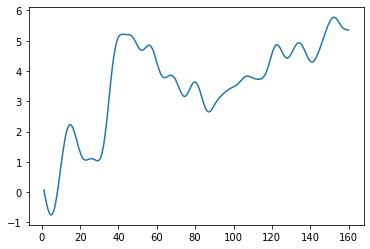

In [92]:
# 濾CH1看看
CH1_HbO2_filter_a = signal.filtfilt(b, c, df.CH1_Oxy)
CH1_HbO2_filter_a

plt.plot(df.Time_Host, CH1_HbO2_filter_a)
plt.show()

### 請用for，不要一行一行濾

In [94]:
# 全部一起濾波
need_filt = ['CH1_Oxy', 'CH1_Deoxy', 'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy']

for need in need_filt:
    dfs[need] = signal.filtfilt(b, c, dfs[need])

# 看前五個
dfs.head()

,Time_Host,Time_Arduino,easingdata,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
0,1.223,0.04,0.0,-0.068582,-0.181339,1.565860,-2.496244,-0.793831,0.542734
1,1.243,0.10,0.0,-0.080111,-0.172526,1.458537,-2.357050,-0.784524,0.534476
2,1.264,0.16,0.0,-0.091696,-0.163650,1.350374,-2.216655,-0.775147,0.526176
3,1.284,0.21,0.0,-0.103334,-0.154714,1.241407,-2.075101,-0.765705,0.517838
4,1.304,0.27,0.0,-0.115018,-0.145721,1.131675,-1.932434,-0.756198,0.509466


### 她媽乾淨

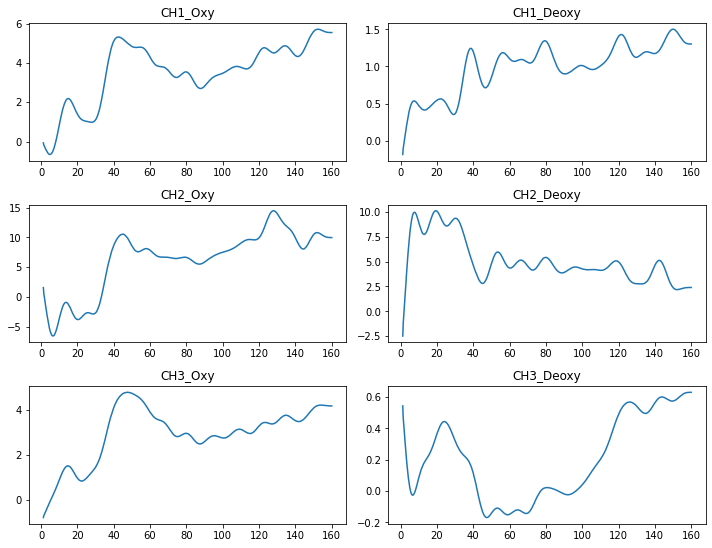

In [95]:
# 濾完了
plt.figure(figsize= (10, 10))

for i, cols in enumerate(need_filt):
    plt.subplot(int((select-3)/2), 2, i+1)
    plt.plot(dfs['Time_Host'], dfs[cols])
    plt.title(cols)
    plt.tight_layout()
plt.show()

# $\star$ 批量濾波 (試試函數能否套用於所有人)

> 上面都是以"一個人"為單位，現在"批量做"



In [99]:
check_states = pd.DataFrame()
need_filt = ['CH1_Oxy', 'CH1_Deoxy', 'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy']
b, c = signal.butter(4, 0.01, 'lowpass')

for i in all_csv:
    filename = i.split('_')[-1]
    name = filename.split('.')[0] 

    dfs = pd.read_csv(i)
    dfs = dfs.iloc[:, :9]

    dfs[np.isinf(dfs)]= None
    dfs = dfs.ffill(axis= 1)

    for needs in need_filt:
        dfs[needs] = signal.filtfilt(b, c, dfs[needs])

    # 看濾完波有沒有人不見    
    check_states[name + '_all'] = dfs.isna().sum()+ np.isinf(dfs).sum()



## 確認有濾好，沒有null

In [100]:
# 以channel為單位
check_states.sum(axis= 1).sort_values(ascending= False)

Time_Host       0
Time_Arduino    0
easingdata      0
CH1_Oxy         0
CH1_Deoxy       0
CH2_Oxy         0
CH2_Deoxy       0
CH3_Oxy         0
CH3_Deoxy       0
dtype: int64

In [101]:
# 以人為單位
rank = check_states.sum(axis= 0).sort_values(ascending= False)[:10]
rank

Carnelian_all      0
Aak_all            0
Hellagur_all       0
SilverAsh_all      0
Saria_all          0
Nightingale_all    0
Hoshiguma_all      0
Shining_all        0
Heavyrain_all      0
Bena_all           0
dtype: int64

# $\star$ MinMax -> 消除個體差異

> 消除個體差異

> $\frac{x - x_{min}}{x_{max} - x_{min}}$

In [102]:
# minmax
dfs.iloc[:, 3:] = (dfs.iloc[:, 3:] - dfs.iloc[:, 3:].min())/(dfs.iloc[:, 3:].max()- dfs.iloc[:, 3:].min())
dfs

,Time_Host,Time_Arduino,easingdata,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
0,1.211,0.04,0.00,0.773183,0.342028,0.721114,0.308785,0.704791,0.310244
1,1.230,0.10,0.00,0.775239,0.339656,0.724566,0.307541,0.712364,0.309125
2,1.251,0.15,0.00,0.777240,0.337274,0.727984,0.306286,0.719914,0.308001
3,1.272,0.21,0.00,0.779185,0.334883,0.731367,0.305019,0.727436,0.306873
4,1.293,0.26,0.00,0.781071,0.332485,0.734712,0.303741,0.734926,0.305740
...,...,...,...,...,...,...,...,...,...
2887,159.796,159.56,-2.67,0.000376,0.004461,0.079581,0.004692,0.088142,0.041787
2888,159.836,159.62,-2.69,0.000378,0.004462,0.079580,0.004694,0.088143,0.041789
2889,159.899,159.67,-2.70,0.000379,0.004463,0.079579,0.004696,0.088144,0.041791
2890,159.981,159.73,-2.72,0.000380,0.004464,0.079578,0.004697,0.088145,0.041792


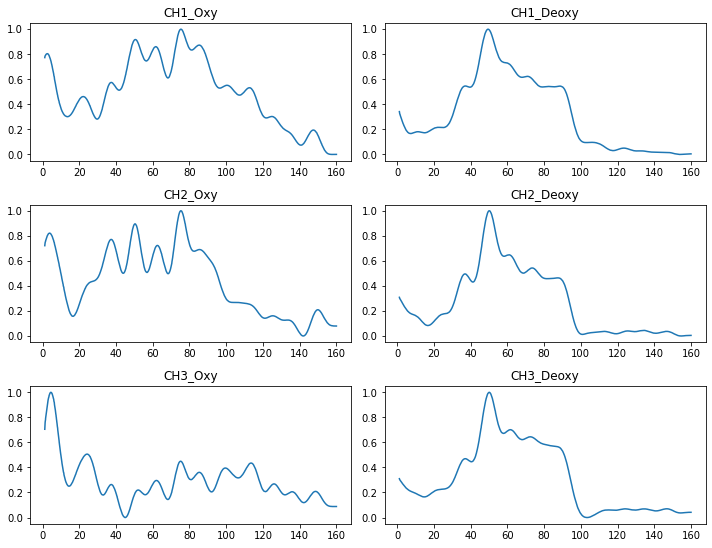

In [103]:
# 畫出來
plt.figure(figsize= (10, 10))
for i, cols in enumerate(need_filt):
    plt.subplot(4, 2, i+1)
    plt.plot(dfs['Time_Host'], dfs[cols])
    plt.title(cols)
    plt.tight_layout()
plt.show()

---
---

# 整理一下整體流程 :  data preprocess + Lowpass filter + Minmax + to_csv

> 一段For (全人)
1. 讀取全部檔案，看是否有人名重複
2. 查看缺失值來判斷要刪除哪些Channel或是人
3. 刪完之後再補值

> 二段For (過濾太多缺失值)
4. 濾波(Filter)
5. minmax 消除個體差異
6. to_csv 存成csv，放於別的資料夾供之後使用


In [138]:
# 若沒資料夾則創資料夾，有就略過
os.getcwd()
try:
    os.mkdir('Filtered')
except:
    pass

In [139]:
# 找所有的csv名字
all_csv = glob.glob('VFT/*.csv')
print("length = ", len(all_csv))

# 計算沒有重複的名字，避免有些人重複多次
count_name = []
for banana in all_csv :
    real_name = banana.split('_')[-1].split('.')[0]
    if not real_name in count_name:
        count_name.append(real_name)

print('unique name = ', len(count_name))

# 看前五個
all_csv[:5]

length =  39
unique name =  39


['VFT\\2021_3_26_1012_Carnelian.csv',
 "VFT\\2021_3_26_1045_Kal'tsit.csv",
 'VFT\\2021_3_26_1118_Skadi-the-Corrupting-Heart.csv',
 'VFT\\2021_3_26_1143_Gladiia.csv',
 'VFT\\2021_3_26_1405_Ash.csv']

In [154]:
need_filt = ['CH1_Oxy', 'CH1_Deoxy', 'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy']
a = 0

print("Number of Data", len(all_csv))
for files in all_csv:
    # 取人名
    filename = files.split('_')[-1]
    name = filename.split('.')[0] 

    #讀跟切(取下要的就好)
    dfs = pd.read_csv(files)
    dfs = dfs.iloc[:, :11]
    dfs.drop(columns=['CH4_Oxy', 'CH4_Deoxy'], inplace= True)



    null_count = dfs.isna().sum() + np.isinf(dfs).sum()
    
    # 刪除缺失值大於1000的人
    many_null = len(null_count[null_count > 1000])

    if many_null > 0:
        print(name, "'s data is not good to use")
        continue
    
    a = a + 1


    # inf to nan to ffill
    dfs[np.isinf(dfs)]= None
    dfs = dfs.ffill(axis= 1)

    # 濾波
    b, c = signal.butter(4, 0.01, 'lowpass')
    for needs in need_filt:
        dfs[needs] = signal.filtfilt(b, c, dfs[needs])

    # minmax
    dfs.iloc[:, 3:] = (dfs[need_filt] - dfs[need_filt].min())/(dfs[need_filt].max()- dfs[need_filt].min())
        
    dfs.to_csv('Filtered\\'+ "F_" + filename, index= False)

print("Number of Data ", a)

Number of Data 39
Saga 's data is not good to use
Specter 's data is not good to use
Number of Data  37


# 讀取濾波完的 .csv，並畫圖
> ### time 變成 index 可以直接用loc切

In [155]:
alls = glob.glob('Filtered/*.csv')
print(len(alls))
alls[:5]

37


['Filtered\\F_Aak.csv',
 'Filtered\\F_Amiya.csv',
 'Filtered\\F_April.csv',
 'Filtered\\F_Archetto.csv',
 'Filtered\\F_Ash.csv']

In [156]:
pd.read_csv(alls[5])

,Time_Host,Time_Arduino,easingdata,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
0,0.035,31.50,16.04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.381,0.04,0.00,0.982881,0.982231,0.982285,0.982622,0.984898,0.982100
2,1.402,0.10,0.00,0.965770,0.964464,0.964580,0.965240,0.969798,0.964203
3,1.423,0.15,0.00,0.948675,0.946706,0.946891,0.947860,0.954709,0.946314
4,1.444,0.21,0.00,0.931601,0.928965,0.929225,0.930490,0.939634,0.928441
...,...,...,...,...,...,...,...,...,...
2885,159.789,159.41,-7.68,0.416742,0.140978,0.609272,0.223283,0.000010,0.701638
2886,159.852,159.46,-8.06,0.416742,0.140979,0.609269,0.223282,0.000006,0.701641
2887,159.894,159.52,-7.39,0.416741,0.140979,0.609267,0.223281,0.000004,0.701644
2888,159.957,159.57,-7.40,0.416741,0.140980,0.609265,0.223280,0.000002,0.701647


In [193]:
# 看個資料型態
check_df = pd.read_csv(alls[25], index_col= 'Time_Host').drop(columns= ['Time_Arduino', 'easingdata'])
print(check_df.dtypes)

check_df.head()

CH1_Oxy      float64
CH1_Deoxy    float64
CH2_Oxy      float64
CH2_Deoxy    float64
CH3_Oxy      float64
CH3_Deoxy    float64
dtype: object


,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
Time_Host,,,,,,
1.168,0.648625,0.000000,0.089901,0.798177,0.203600,0.557448
1.189,0.639620,0.014639,0.093199,0.789533,0.203074,0.558705
1.209,0.630684,0.029157,0.096477,0.780949,0.202562,0.559946
1.292,0.621821,0.043549,0.099736,0.772426,0.202064,0.561171
1.312,0.613034,0.057810,0.102974,0.763969,0.201580,0.562380


# 畫圖

### matplotlib.pyplot 自己練

重點:
1. `facecolor=sns.color_palette('Paired')[1]`  -> 自己配色會比我阿嬤還醜
2. `bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),)1` -> bbox 可以唱bbox

### 階段

* 第一階段: 0 ~ 30  -> rest
* 第二階段: 30 ~ 90  -> Task
* 第三階段: 90 ~ 160  -> recovery

In [194]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]



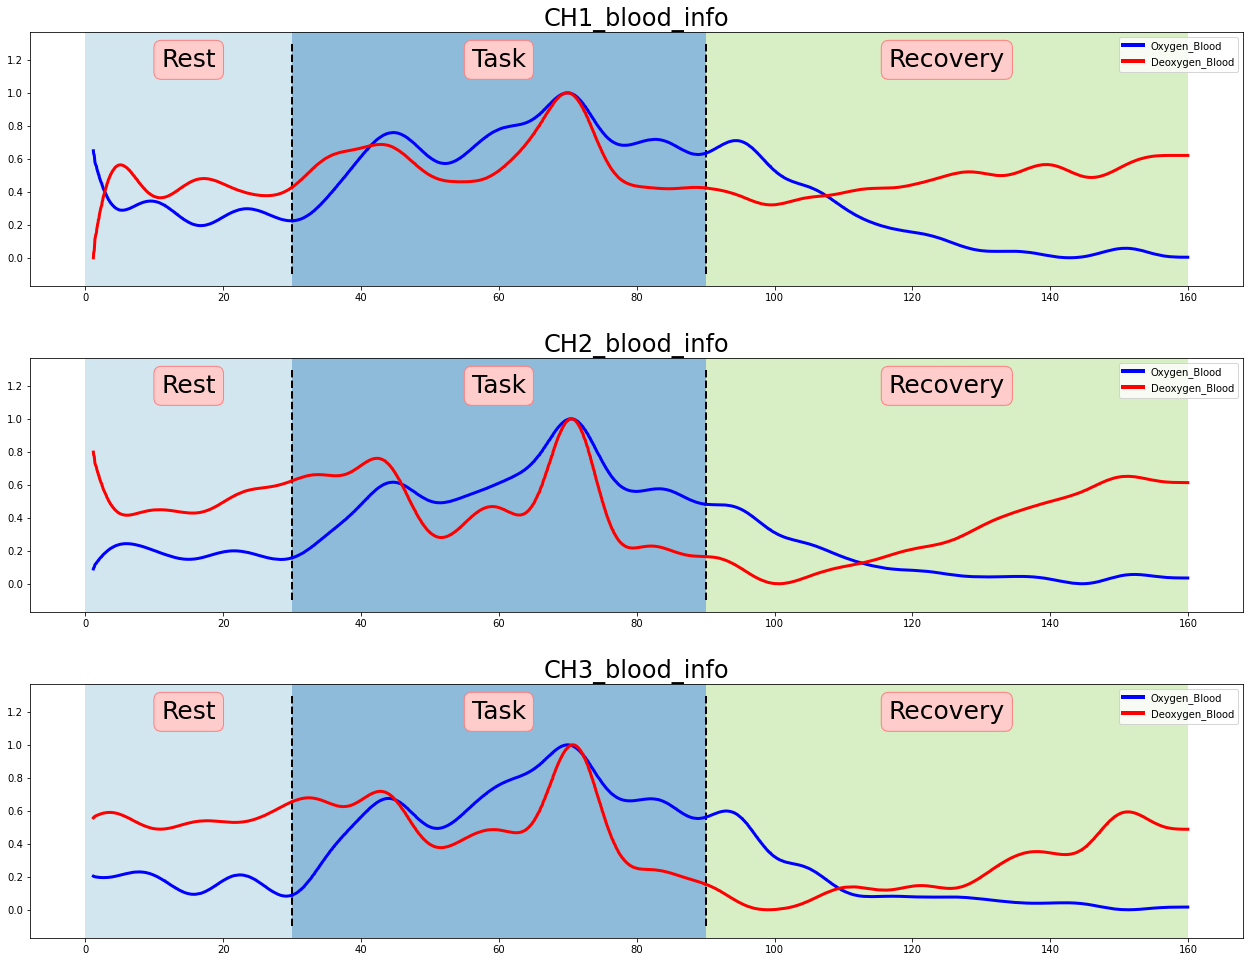

In [195]:
stage1 = 30
stage2 = 90
stage3 = 160
text_size = 25

plt.figure(figsize= (18, 14))
for i in range(len(check_df.columns)//2):
    plt.subplot(3, 1, i+1)

    # 第一階段
    plt.plot(check_df.loc[:stage1].index, check_df.loc[:stage1].iloc[:, 2*i], c= 'b',  linewidth=3.0, label= 'Rest_Oxy')
    plt.plot(check_df.loc[:stage1].index, check_df.loc[:stage1].iloc[:, 2*i + 1], c= 'r',  linewidth=3.0, label= 'Rest_deoxy')

    plt.axvspan(0, stage1, facecolor = sns.color_palette('Paired')[0], alpha=0.5)
    plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
    plt.text(stage1/2, 1.2, "Rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))

    # 第二階段
    plt.plot(check_df.loc[stage1:stage2].index, check_df.loc[stage1:stage2].iloc[:, 2*i], c= 'b', linewidth=3.0, label= 'Task_Oxy')
    plt.plot(check_df.loc[stage1:stage2].index, check_df.loc[stage1:stage2].iloc[:, 2*i + 1], c= 'r', linewidth=3.0, label= 'Task_Deoxy')
    
    plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
    plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
    plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    # 第三階段
    plt.plot(check_df.loc[stage2:stage3].index, check_df.loc[stage2:stage3].iloc[:, 2*i], c= 'b', linewidth=3.0, label= 'Recovery_Oxy')
    plt.plot(check_df.loc[stage2:stage3].index, check_df.loc[stage2:stage3].iloc[:, 2*i + 1], c= 'r', linewidth=3.0, label= 'Recovery_Oxy')

    plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.5)
    plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    plt.title(f'CH{i+1}_blood_info', fontdict={'fontsize': 24})
    plt.legend(custom_lines, ['Oxygen_Blood', 'Deoxygen_Blood'])
    plt.tight_layout(pad= 3)
plt.show()